# YOLO en Tiempo Real: Detección de Objetos
### Percepción Computacional - Universidad de los Hemisferios
#### Maestría en Inteligencia Artificial Aplicada

Bienvenidos a este cuaderno de Jupyter, donde exploraremos la tarea de la detección de objetos en tiempo real utilizando **YOLO (You Only Look Once)**, una técnica avanzada de visión por computadora. Esta experiencia de aprendizaje forma parte del programa de la Maestría en Inteligencia Artificial Aplicada, impartido por la Universidad de los Hemisferios.

En este cuaderno, aprenderás a utilizar YOLO para identificar y localizar diversos objetos en imágenes y secuencias de video. Esta habilidad es esencial en una amplia gama de aplicaciones, desde la conducción autónoma hasta la vigilancia de seguridad, y representa uno de los avances más emocionantes en el campo de la inteligencia artificial y la visión por computadora.

A lo largo de este curso, explorarás conceptos clave como:

- Detección de objetos en tiempo real.
- Configuración de modelos YOLO pre-entrenados.
- Interpretación de resultados de detección.
- Aplicaciones prácticas de la detección de objetos.

¡Prepárate para adquirir habilidades valiosas que te servirán en tu carrera en inteligencia artificial y más allá!

Recuerda consultar este cuaderno para acceder a los recursos y ejemplos que te ayudarán a comprender YOLO y la percepción computacional en tiempo real.

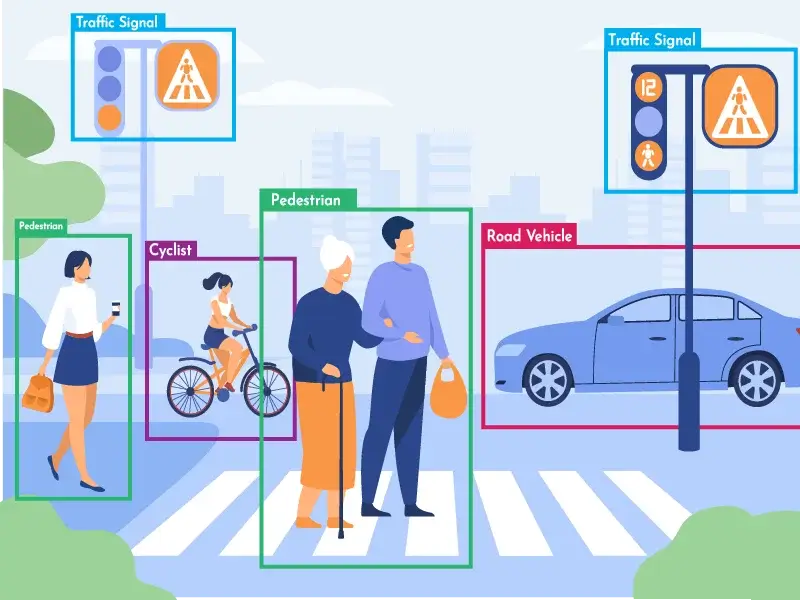

El siguiente código utiliza el comando `!pip` para instalar dos paquetes de Python: `opencv-python` y `ultralytics`.

- `opencv-python`: Esta es una biblioteca popular para tareas de visión por computadora en Python. Proporciona una variedad de funciones para el procesamiento de imágenes y videos, incluyendo detección de objetos, manipulación de imágenes y extracción de características.

- `ultralytics`: Esta es una biblioteca construida sobre PyTorch, que se enfoca principalmente en tareas de visión por computadora como detección de objetos y clasificación de imágenes. Proporciona interfaces fáciles de usar para entrenar y evaluar modelos de aprendizaje profundo para estas tareas.

Al ejecutar este comando, estás instalando estos paquetes en tu entorno de Python para que puedas usarlos en tu código.

In [1]:
# Instalamos las librerías necesarias
!pip install opencv-python ultralytics

Este fragmento de código importa tres bibliotecas en Python:

1. `ultralytics`: Esta es una biblioteca que proporciona una interfaz para usar modelos de detección de objetos YOLO (You Only Look Once). Permite entrenar, evaluar y utilizar modelos de detección de objetos de manera eficiente.

2. `cv2` (OpenCV): Esta es una biblioteca popular para el procesamiento de imágenes y videos en Python. Proporciona una amplia gama de funciones para trabajar con imágenes y videos, incluyendo cargar imágenes, realizar operaciones de procesamiento de imágenes, y mostrar imágenes en una ventana, entre otros.

3. `math`: Este es un módulo estándar de Python que proporciona funciones matemáticas comunes, como funciones trigonométricas, logarítmicas y aritméticas.

El código importa estas bibliotecas para utilizarlas en el resto del programa, pero en este fragmento específico no se están utilizando ninguna función o clase de estas bibliotecas.

In [4]:
# Importamos las librerías necesarias
from ultralytics import YOLO
import cv2
import math

In [5]:
# Cargamos el modelo YOLO pre-entrenado en COCO dataset
model = YOLO("yolo-Weights/yolov8n.pt")

In [4]:
# Revisamos las clases que puede detectar el modelo
model.names

{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou

In [6]:
# Definimos una lista de nombres con todas las clases para identificar objetos detectados
classNames = ["person", "bicycle", "car", "motorbike", "aeroplane", "bus", "train", "truck", "boat",
              "traffic light", "fire hydrant", "stop sign", "parking meter", "bench", "bird", "cat",
              "dog", "horse", "sheep", "cow", "elephant", "bear", "zebra", "giraffe", "backpack", "umbrella",
              "handbag", "tie", "suitcase", "frisbee", "skis", "snowboard", "sports ball", "kite", "baseball bat",
              "baseball glove", "skateboard", "surfboard", "tennis racket", "bottle", "wine glass", "cup",
              "fork", "knife", "spoon", "bowl", "banana", "apple", "sandwich", "orange", "broccoli",
              "carrot", "hot dog", "pizza", "donut", "cake", "chair", "sofa", "pottedplant", "bed",
              "diningtable", "toilet", "tvmonitor", "laptop", "mouse", "remote", "keyboard", "cell phone",
              "microwave", "oven", "toaster", "sink", "refrigerator", "book", "clock", "vase", "scissors",
              "teddy bear", "hair drier", "toothbrush"
              ] # Aquí se enumeran todas las clases

In [6]:
# Configuramos la captura de video desde la cámara
captura = cv2.VideoCapture(0) # Se abre la cámara por defecto

# Establecemos el ancho y alto de la imagen
captura.set(cv2.CAP_PROP_FRAME_WIDTH, 640) # Ancho de la imagen
captura.set(cv2.CAP_PROP_FRAME_HEIGHT, 480) # Alto de la imagen
# Iniciamos un bucle para procesar los fotogramas de la cámara
while True:
    success, img = captura.read() # Capturamos un fotograma

    # Realizamos la detección de objetos en la imagen capturada (usando el modelo de YOLO pre-entrenado que cargamos anteriormente)
    results = model(img, stream=True)

   # Procesamos los resultados de la detección
    for r in results:
        boxes = r.boxes
        
        # Iteramos sobre las cajas delimitadoras detectadas
        for box in boxes:
            # Obtenemos las coordenadas de la caja delimitadora
            x1, y1, x2, y2 = box.xyxy[0]
            x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2) # Convertimos a valores enteros

            # Dibujamos la caja delimitadora en la imagen
            cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 255), 1)

            # Obtenemos la confianza de la detección
            confidence = math.ceil((box.conf[0]*100))/100
            print("Confidence --->",confidence)

            # Obtenemos el nombre de la clase detectada
            cls = int(box.cls[0])
            print("Class name -->", classNames[cls])

            # Mostramos el nombre de la clase junto a la caja delimitadora
            org = [x1, y1]
            font = cv2.FONT_HERSHEY_SIMPLEX
            fontScale = 1
            color = (255, 0, 0) # Color: Azul (formato BGR)
            thickness = 1
            cv2.putText(img, classNames[cls], org, font, fontScale, color, thickness)

    # Mostramos la imagen con las detecciones
    cv2.imshow('Webcam', img)

    # Salimos del bucle si se presiona la tecla 'q'
    #if cv2.waitKey(1) == ord('q'):
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

# Liberamos la cámara y cerramos todas las ventanas
captura.release()
cv2.destroyAllWindows()

2024-06-17 18:13:49.306 Python[85581:5068749] WARNING: AVCaptureDeviceTypeExternal is deprecated for Continuity Cameras. Please use AVCaptureDeviceTypeContinuityCamera and add NSCameraUseContinuityCameraDeviceType to your Info.plist.



0: 480x640 (no detections), 214.5ms
Speed: 8.7ms preprocess, 214.5ms inference, 9.8ms postprocess per image at shape (1, 3, 480, 640)



2024-06-17 18:13:57.002 Python[85581:5068749] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.


0: 480x640 (no detections), 178.4ms
Speed: 2.3ms preprocess, 178.4ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 362.6ms
Speed: 1.9ms preprocess, 362.6ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 387.5ms
Speed: 4.4ms preprocess, 387.5ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 mouse, 145.7ms
Confidence ---> 0.3
Class name --> mouse
Speed: 1.6ms preprocess, 145.7ms inference, 6.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 140.6ms
Speed: 1.4ms preprocess, 140.6ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 mouse, 147.3ms
Confidence ---> 0.26
Class name --> mouse
Speed: 1.8ms preprocess, 147.3ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 mouse, 138.8ms
Confidence ---> 0.26
Class name --> mouse
Speed: 1.5ms preprocess, 138.8ms inference, 1.1ms pos

: 

In [1]:
# Lista de índices de clases de interés
clases_interes = [0, 1, 2]

In [7]:
# Configuramos la captura de video desde la cámara
captura = cv2.VideoCapture(0) # Se abre la cámara por defecto

# Establecemos el ancho y alto de la imagen
captura.set(cv2.CAP_PROP_FRAME_WIDTH, 640) # Ancho de la imagen
captura.set(cv2.CAP_PROP_FRAME_HEIGHT, 480) # Alto de la imagen
# Iniciamos un bucle para procesar los fotogramas de la cámara
while True:
    success, img = captura.read() # Capturamos un fotograma

    # Realizamos la detección de objetos en la imagen capturada (usando el modelo de YOLO pre-entrenado que cargamos anteriormente)
    results = model(img, stream=True)

    # Procesamos los resultados de la detección
    for r in results:
        boxes = r.boxes

        # Iteramos sobre las cajas delimitadoras detectadas
        for box in boxes:
            # Obtenemos el nombre de la clase detectada
            cls = int(box.cls[0])

            # Solo procesamos la detección si la clase es de interés
            if cls in clases_interes:
                # Obtenemos las coordenadas de la caja delimitadora
                x1, y1, x2, y2 = box.xyxy[0]
                x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2) # Convertimos a valores enteros

                # Dibujamos la caja delimitadora en la imagen
                cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 255), 1)

                # Obtenemos la confianza de la detección
                confidence = math.ceil((box.conf[0]*100))/100
                print("Confidence --->",confidence)

                print("Class name -->", classNames[cls])

                # Mostramos el nombre de la clase junto a la caja delimitadora
                org = [x1, y1]
                font = cv2.FONT_HERSHEY_SIMPLEX
                fontScale = 1
                color = (255, 0, 0) # Color: Azul (formato BGR)
                thickness = 1
                cv2.putText(img, classNames[cls], org, font, fontScale, color, thickness)

# Mostramos la imagen con las detecciones
    cv2.imshow('Webcam', img)

    # Salimos del bucle si se presiona la tecla 'q'
    #if cv2.waitKey(1) == ord('q'):
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

# Liberamos la cámara y cerramos todas las ventanas
captura.release()
cv2.destroyAllWindows()

2024-06-17 18:24:55.681 Python[85801:5076326] WARNING: AVCaptureDeviceTypeExternal is deprecated for Continuity Cameras. Please use AVCaptureDeviceTypeContinuityCamera and add NSCameraUseContinuityCameraDeviceType to your Info.plist.



0: 480x640 1 person, 226.2ms
Confidence ---> 0.9
Class name --> person
Speed: 10.0ms preprocess, 226.2ms inference, 11.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 153.5ms
Confidence ---> 0.88
Class name --> person
Speed: 2.3ms preprocess, 153.5ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


2024-06-17 18:25:03.566 Python[85801:5076326] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.



0: 480x640 1 person, 307.1ms
Confidence ---> 0.88
Class name --> person
Speed: 1.7ms preprocess, 307.1ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 316.8ms
Confidence ---> 0.89
Class name --> person
Speed: 25.5ms preprocess, 316.8ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 146.8ms
Confidence ---> 0.93
Class name --> person
Speed: 2.2ms preprocess, 146.8ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 172.3ms
Confidence ---> 0.9
Class name --> person
Speed: 1.5ms preprocess, 172.3ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 150.8ms
Confidence ---> 0.92
Class name --> person
Speed: 1.6ms preprocess, 150.8ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 145.7ms
Confidence ---> 0.92
Class name --> person
Speed: 1.5ms preprocess, 145.7ms inference, 0.8ms postprocess per image 

: 

### **Tarea: Aplicación de detección de objetos específicos con YOLO**

#### **Objetivo:** Modificar el script de detección de objetos en tiempo real con YOLO para que solo detecte ciertas clases de objetos. Luego, darle una aplicación específica a esta detección.

**Instrucciones:**

1. Elija un subconjunto de las 80 clases disponibles en YOLO que sean relevantes para una aplicación específica. Por ejemplo, si está creando una aplicación para ayudar a los conductores a detectar peatones y vehículos, podría elegir las clases 'persona', 'bicicleta', 'coche', 'moto', 'autobús' y 'camión'.

2. Modifique el script de detección de objetos en tiempo real para que solo detecte las clases que ha seleccionado. Para hacer esto, necesitará crear una lista de los índices de las clases que ha selecciono y luego agregar una condición en el bucle donde se procesan los resultados de la detección para solo procesar las detecciones que corresponden a las clases seleccionadas.

3. Pruebe su script modificado para asegurarse de que solo está detectando las clases que ha seleccionado.

4. Piense en una aplicación específica para su detección de objetos. ¿Cómo podría usar la información de las detecciones para ayudar al usuario? Por ejemplo, en la aplicación para conductores, podría alertar al usuario si detecta un peatón o un vehículo en una zona de peligro.

5. Escriba un breve informe que describa las clases que seleccionó, cómo modificó el script de detección de objetos, los resultados de sus pruebas y la aplicación específica que ha ideado para su detección de objetos.

**Recursos:**

- Documentación de YOLO: https://pjreddie.com/darknet/yolo/
- Tutorial de detección de objetos con YOLO: https://www.pyimagesearch.com/2018/11/12/yolo-object-detection-with-opencv/

Fecha de entrega: [Fecha]

Por favor, entregue su script modificado y su informe en formato PDF a través de [método de entrega].